In [20]:
import cv2
import os
import numpy as np
from random import shuffle
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
TRAIN_DIR = 'D:/Kuliah/Tugas Akhir/Gambar/train'
TEST_DIR = 'D:/Kuliah/Tugas Akhir/Gambar/test'
IMG_SIZE = 500
LR = 1e-3

In [22]:
# Function to Get the current
# working directory
def current_path():
    print("Current working directory before")
    print(os.getcwd())
    print()
current_path()
os.chdir('D:\Kuliah\Tugas Akhir\Referensi\Fix\Model')
current_path()

Current working directory before
D:\Kuliah\Tugas Akhir\Referensi\Fix\Model

Current working directory before
D:\Kuliah\Tugas Akhir\Referensi\Fix\Model



In [23]:
'''Setting up the model which will help with tensorflow models'''
MODEL_NAME = 'IntegralVSPeluang-{}-{}.model'.format(LR, '6conv-basic')

In [24]:
def func():
    return 0.5

In [25]:
'''Labelling the dataset'''
def label_img(img):
    word_label = img.split('.')[0]
    # DIY One hot encoder
    if word_label == 'Integral': return ['Integral']
    elif word_label == 'Peluang': return ['Peluang']

In [26]:
'''Creating the training data'''
def create_train_data():
    # Creating an empty list where we should store the training data
    # after a little preprocessing of the data
    training_data = []
  
    # tqdm is only used for interactive loading
    # loading the training data
    for img in tqdm(os.listdir(TRAIN_DIR)):
  
        # labeling the images
        label = label_img(img)
  
        path = os.path.join(TRAIN_DIR, img)
  
        # loading the image from the path and then converting them into
        # grayscale for easier covnet prob
        img = cv2.imread(path)
  
        # resizing the image for processing them in the covnet
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        
        ## grayscale for easier covnet prob
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
        # final step-forming the training data list with numpy array of the images
        training_data.append([img, label])
  
    # shuffling of the training data to preserve the random state of our data
    shuffle(training_data, func)
  
    # saving our trained data for further uses if required
    np.save('train_data.npy', training_data)
    return training_data

In [27]:
'''Processing the given test data'''
# Almost same as processing the training data but
# we dont have to label it.
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_num = img.split('.')[0]
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        testing_data.append([np.array(img), img_num])
          
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [28]:
'''Running the training and the testing in the dataset for our model'''
train_data = create_train_data()
test_data = process_test_data()

100%|███████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 343.16it/s]
C:\Users\HP\AppData\Local\Temp\ipykernel_11972\1095906699.py:30: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  shuffle(training_data, func)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)
100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 356.88it/s]


In [29]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
'''Setting up the features and labels'''
# X-Features & Y-Labels
labels = LabelEncoder()
X = np.array([i[0] for i in train_data])/255
Y = [i[1] for i in train_data]
labels.fit(Y)
Y = labels.transform(Y)
X.shape

(160, 500, 500)

In [31]:
train_images, test_images, train_labels, test_labels = train_test_split(X,Y, test_size=0.2, random_state=123)

In [32]:
model = models.Sequential()
model.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2))

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
'''Fitting the data into our model'''
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit(train_images, np.asarray(train_labels), epochs = 20, 
                    validation_data =(test_images, np.asarray(test_labels)),
                    batch_size = 200)

Epoch 1/20
1/1 [==============================] - 54s 54s/step - loss: 0.6929 - accuracy: 0.5000 - val_loss: 87.7366 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 20s 20s/step - loss: 90.3388 - accuracy: 0.5000 - val_loss: 25.8987 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 30s 30s/step - loss: 23.5370 - accuracy: 0.5000 - val_loss: 16.3091 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 39s 39s/step - loss: 14.8197 - accuracy: 0.5000 - val_loss: 13.9189 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 53s 53s/step - loss: 14.2911 - accuracy: 0.5000 - val_loss: 11.9844 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 47s 47s/step - loss: 12.2313 - accuracy: 0.5000 - val_loss: 3.3047 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 40s 40s/step - loss: 3.1855 - accuracy: 0.5000 - val_loss: 10.4352 - val_accuracy: 0.5000
Epoch 8/20
1/1 [

In [35]:
from sklearn import metrics

predictions = model.predict(test_images)
y_pred = predictions
matrix_test = metrics.classification_report(test_labels, y_pred.argmax(axis=1))
print("Testing selesai")
print(matrix_test)

1/1 [==============================] - 1s 1s/step
Testing selesai
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.85      0.69      0.76        16

    accuracy                           0.78        32
   macro avg       0.79      0.78      0.78        32
weighted avg       0.79      0.78      0.78        32



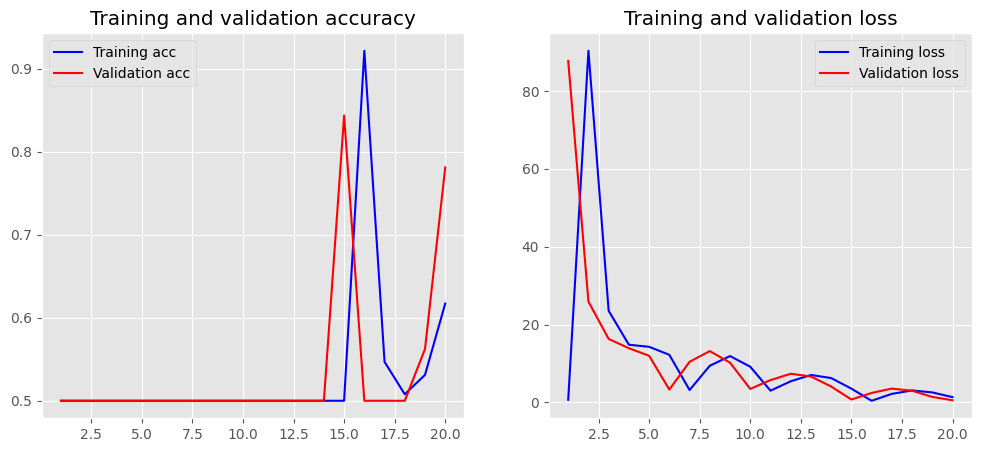

In [36]:
# history.history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

In [37]:
model.save('1CK4CS.h5')
print("Model has created!")

Model has created!


In [38]:
model = models.Sequential()
model.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2))

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
'''Fitting the data into our model'''
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit(train_images, np.asarray(train_labels), epochs = 20, 
                    validation_data =(test_images, np.asarray(test_labels)),
                    batch_size = 200)

Epoch 1/20
1/1 [==============================] - 118s 118s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 6.7803 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 75s 75s/step - loss: 6.2024 - accuracy: 0.5000 - val_loss: 6.5585 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 76s 76s/step - loss: 6.7618 - accuracy: 0.5000 - val_loss: 0.9383 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 79s 79s/step - loss: 0.9243 - accuracy: 0.5000 - val_loss: 0.8977 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 75s 75s/step - loss: 0.8259 - accuracy: 0.5000 - val_loss: 0.6192 - val_accuracy: 0.5312
Epoch 6/20
1/1 [==============================] - 77s 77s/step - loss: 0.5744 - accuracy: 0.7344 - val_loss: 0.7534 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 80s 80s/step - loss: 0.5463 - accuracy: 0.6094 - val_loss: 0.6598 - val_accuracy: 0.8750
Epoch 8/20
1/1 [=========

In [41]:
from sklearn import metrics

predictions = model.predict(test_images)
y_pred = predictions
matrix_test = metrics.classification_report(test_labels, y_pred.argmax(axis=1))
print("Testing selesai")
print(matrix_test)

1/1 [==============================] - 2s 2s/step
Testing selesai
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.50      1.00      0.67        16

    accuracy                           0.50        32
   macro avg       0.25      0.50      0.33        32
weighted avg       0.25      0.50      0.33        32



C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

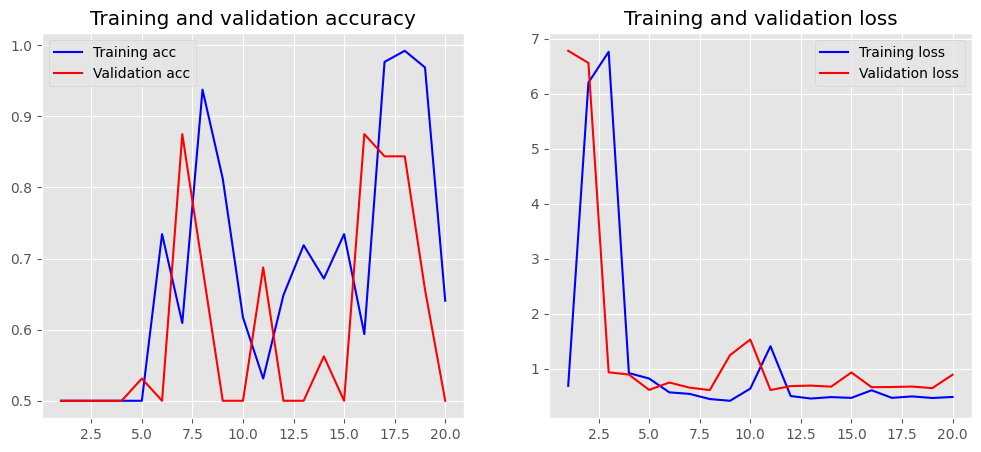

In [42]:
# history.history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

In [43]:
model.save('2CK4CS.h5')
print("Model has created!")

Model has created!


In [44]:
model = models.Sequential()
model.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2))

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
'''Fitting the data into our model'''
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit(train_images, np.asarray(train_labels), epochs = 20, 
                    validation_data =(test_images, np.asarray(test_labels)),
                    batch_size = 200)

Epoch 1/20
1/1 [==============================] - 73s 73s/step - loss: 0.6950 - accuracy: 0.5000 - val_loss: 5.8158 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 76s 76s/step - loss: 6.0591 - accuracy: 0.5000 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 65s 65s/step - loss: 0.6897 - accuracy: 0.5000 - val_loss: 0.7261 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 67s 67s/step - loss: 0.7112 - accuracy: 0.5000 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 78s 78s/step - loss: 0.6915 - accuracy: 0.5156 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 67s 67s/step - loss: 0.7005 - accuracy: 0.5000 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 62s 62s/step - loss: 0.6903 - accuracy: 0.5391 - val_loss: 0.7368 - val_accuracy: 0.5000
Epoch 8/20
1/1 [===========

In [47]:
from sklearn import metrics

predictions = model.predict(test_images)
y_pred = predictions
matrix_test = metrics.classification_report(test_labels, y_pred.argmax(axis=1))
print("Testing selesai")
print(matrix_test)

1/1 [==============================] - 2s 2s/step
Testing selesai
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.50      1.00      0.67        16

    accuracy                           0.50        32
   macro avg       0.25      0.50      0.33        32
weighted avg       0.25      0.50      0.33        32



C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

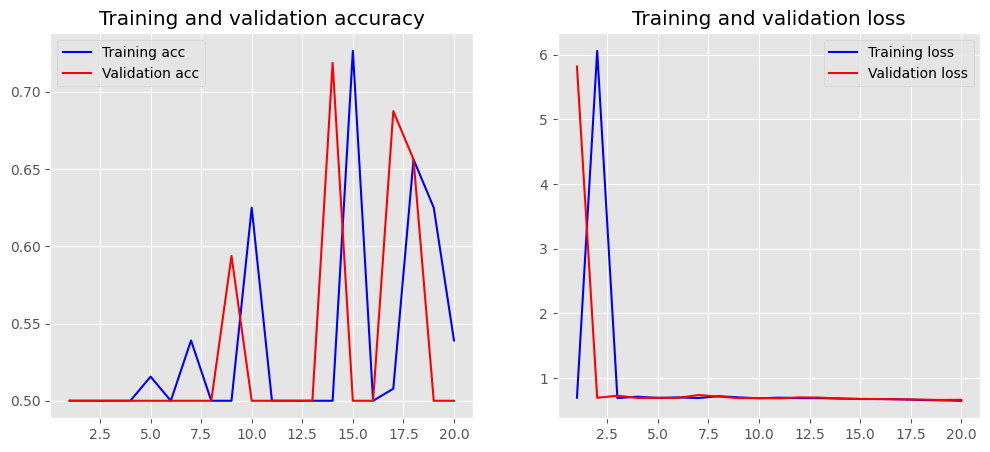

In [48]:
# history.history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

In [49]:
model.save('3CK4CS.h5')
print("Model has created!")

Model has created!


In [39]:
result = model.evaluate(test_images, test_labels)

1/1 [==============================] - 2s 2s/step - loss: 0.6955 - accuracy: 0.5000


In [40]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.6955040097236633
accuracy : 0.5


In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 497, 497, 32)      544       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 248, 248, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 245, 245, 32)      16416     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 122, 122, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 119, 119, 32)      16416     
                                                                 
 flatten_1 (Flatten)         (None, 453152)           

4/4 [==============================] - 7s 2s/step


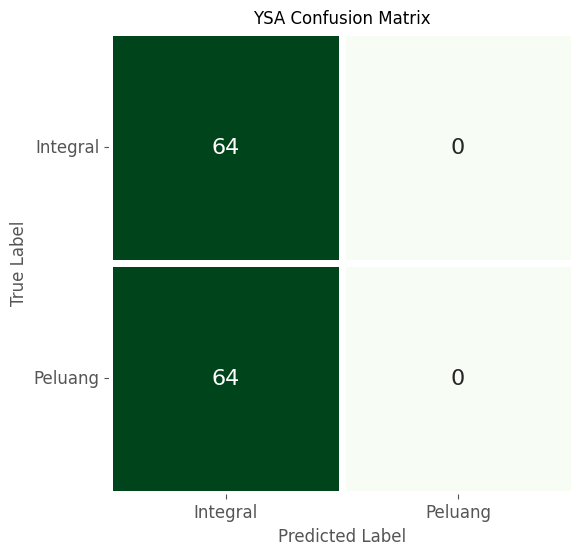

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(train_images)

def toClass(pred):
    
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
        
    return class_

cm = confusion_matrix(train_labels,toClass(y_pred))

df1 = pd.DataFrame(columns=["Integral","Peluang"], index= ["Integral","Peluang"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

1/1 [==============================] - 2s 2s/step


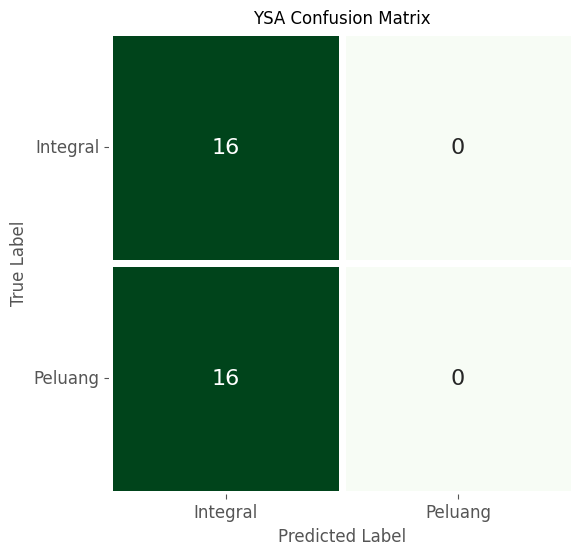

In [44]:
y_pred = model.predict(test_images)

def toClass(pred):
    
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
        
    return class_

cm = confusion_matrix(test_labels, toClass(y_pred))

df1 = pd.DataFrame(columns=["Integral","Peluang"], index= ["Integral","Peluang"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()

In [45]:
model.save('4CK.h5')
print("Model has created!")

Model has created!
